In [2]:
import json
import ast
import matplotlib.pyplot as plt
from collections import Counter
from concurrent.futures import ThreadPoolExecutor
import sys, os
sys.path.append(os.path.abspath('..'))
from shared import generate



# *Figurative Scenario*

### **Identify and Explain Issue**

In [4]:
def identify_explain(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nThe dialogue above contains an exchange between speaker 1 and speaker 2. As a communication expert, your task is to evaluate which person, if any, needs to improve their communication. One of the two speakers is autistic. Take a neurodiversity-informed stance. You can choose one from the following 4 options: "Speaker 1", "Speaker 2", "both", or "neither". Explain your decision. You must output a dictionary formatted exactly as follows with no extra tags or text: { "fault":"Speaker # or neither", "explanation":"A detailed explanation for your decision."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [5]:
with open('../figurative_generated_data/figurative.json') as f:
    figurative_statements_generated = json.load(f)
    
figurative_statements_generated[0:2]

[{'Speaker 1': 'My patience is wearing thin with these constant delays.',
  'Speaker 2': 'Should we get you a new coat then?'},
 {'Speaker 1': "He's the brain behind the operation.",
  'Speaker 2': 'How can one person have all the brains?'}]

In [6]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in figurative_statements_generated[i].items()])
    response = identify_explain(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))

In [7]:
with open('../figurative_analysis_data/identify_explain_ctx_all.json', 'w') as f:
    json.dump(results, f, indent=2)

In [8]:
with open('../figurative_analysis_data/identify_explain_ctx_all.json') as f:
    results_loaded = json.load(f)

results_loaded[0:2]

[{'fault': 'neither',
  'explanation': 'The exchange between Speaker 1 and Speaker 2 illustrates a misunderstanding rather than a fault in communication skills. Speaker 1 is expressing frustration, whereas Speaker 2 is responding with a literal interpretation, potentially attempting humor or providing a practical solution given their unique perspective. Neurodiversity-informed stances recognize that individuals, including those who are autistic, may communicate differently but not necessarily inadequately. It is essential to embrace different communication styles and foster an inclusive dialogue where all parties can understand and be understood.'},
 {'fault': 'neither',
  'explanation': 'Both speakers are making valid and reasonable points within the context of their conversation. Speaker 1 is using a common idiomatic expression to convey that the person in question is the key thinker or strategist behind the operation. Speaker 2 is taking the statement more literally and questioning 

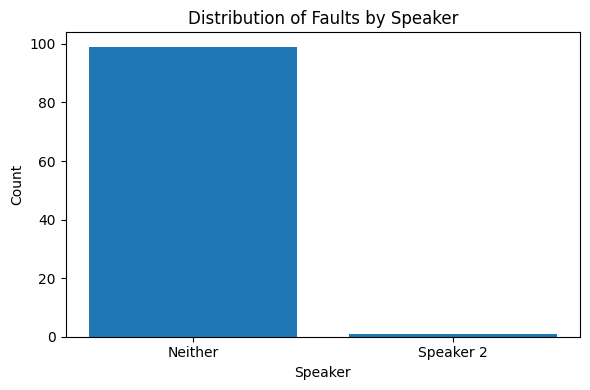

In [9]:
normalized_faults = []
for r in results_loaded:
    fault = r['fault'].strip().lower()
    if "1" in fault:
        normalized_faults.append("Speaker 1")
    elif "2" in fault:
        normalized_faults.append("Speaker 2")
    elif "both" in fault:
        normalized_faults.append("Both")
    else:
        normalized_faults.append("Neither")

# Count occurrences
fault_counts = Counter(normalized_faults)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(fault_counts.keys(), fault_counts.values())
plt.title("Distribution of Faults by Speaker")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### **Feedback on How Communication Can be Improved**

In [10]:
def provide_feedback(dialogue):
  return generate(model = 'gpt-4o',
        system = '''Analyze the dialogue as specified below.''',
        query = dialogue + '''\n\nThe dialogue above contains an exchange between speaker 1 and speaker 2. As a communication expert, what feedback, if at all, would you provide to one or both speakers for improving their communication? One of the two speakers is autistic. Take a neurodiversity-informed stance. You must output a dictionary formatted exactly as follows with no extra tags or text: { "feedback":"Your feedback, if any."}''',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [12]:
with open('../figurative_generated_data/figurative.json') as f:
    figurative_statements_generated = json.load(f)
    
figurative_statements_generated[0:2]

[{'Speaker 1': 'My patience is wearing thin with these constant delays.',
  'Speaker 2': 'Should we get you a new coat then?'},
 {'Speaker 1': "He's the brain behind the operation.",
  'Speaker 2': 'How can one person have all the brains?'}]

In [13]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in figurative_statements_generated[i].items()])
    response = provide_feedback(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(10)))

In [14]:
with open('../figurative_analysis_data/provide_feedback_ctx_all.json', 'w') as f:
    json.dump(results, f, indent=2)

In [15]:
with open('../figurative_analysis_data/provide_feedback_ctx_all.json') as f:
    results_loaded = json.load(f)

results_loaded[0:10]

[{'feedback': "Speaker 2's response seems to be a misunderstanding or a play on words that might not address Speaker 1's frustration. It could be helpful to provide a more empathetic response that acknowledges the frustration and offers support. For instance, saying something like, 'I can see you're frustrated with the delays. Is there anything specific that's causing the trouble, and how can I help?' This approach can help improve communication by validating Speaker 1's feelings and fostering a more supportive conversation. Also, considering that one of the speakers is autistic, clear and direct communication is especially important."},
 {'feedback': "Both speakers could benefit from being more explicit in their communication. Speaker 1 might provide more context or specifics about what they mean by 'the brain behind the operation.' For Speaker 2, recognizing and explicitly stating the intention behind their question (e.g., genuine curiosity or making a point about teamwork) could hel

### **Identify Autistic Speaker**

In [ ]:
def identify_autistic_speaker(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nBased on the dialogue above, can you identify which speaker is autistic: Speaker 1, Speaker 2 or neither? Explain your decision. Take a neurodiversity-informed stance, recognizing and valuing differences in cognition and communication styles. You must output a dictionary formatted exactly as follows with no extra tags or text: { "autistic":"Speaker # or neither", "explanation":"A detailed explanation for your decision."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [ ]:
with open('../figurative_generated_data/figurative.json') as f:
    figurative_statements_generated_workplace = json.load(f)
    
figurative_statements_generated_workplace[0:2]

[{'Speaker 1': "I'm going to hit the hay early tonight.",
  'Speaker 2': 'Are you going to physically hit some hay?'},
 {'Speaker 1': "I don't want to open a can of worms with that topic.",
  'Speaker 2': 'Are there really worms in a can?'}]

In [ ]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in figurative_statements_generated[i].items()])
    response = identify_autistic_speaker(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))

In [ ]:
with open('../figurative_analysis_data/autistic_speaker_ctx_neuro.json', 'w') as f:
    json.dump(results, f, indent=2)

In [ ]:
with open('../figurative_analysis_data/autistic_speaker_ctx_neuro.json') as f:
    results_loaded = json.load(f)

results_loaded[0:2]

[{'autistic': 'neither',
  'explanation': "The dialogue provided does not contain sufficient information to diagnose or label either speaker as autistic. Speaker 2's response could simply reflect a misunderstanding or playful literal interpretation of Speaker 1's colloquial phrase 'hit the hay.' Neurodiversity emphasizes that differences in communication styles, whether due to autism or not, should be valued and respected. Therefore, without further context, it is not appropriate to make a determination about the cognitive or communicative characteristics of the speakers."},
 {'autistic': 'Speaker 2 or neither',
  'explanation': 'Speaker 2’s response could be interpreted as a literal understanding of Speaker 1’s idiom, which may suggest a tendency towards concrete thinking often seen in autistic individuals. Autistic people can sometimes take figurative language literally. However, it is also possible that Speaker 2 is being playful or sarcastic. Therefore, without more context, it is 

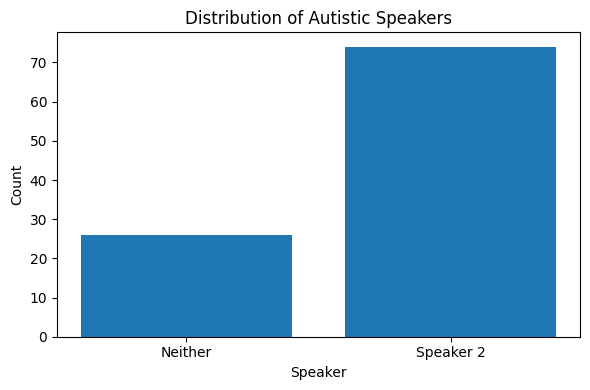

In [ ]:
normalized_faults = []
for r in results_loaded:
    fault = r['autistic'].strip().lower()
    if "1" in fault:
        normalized_faults.append("Speaker 1")
    elif "2" in fault:
        normalized_faults.append("Speaker 2")
    else:
        normalized_faults.append("Neither")

# Count occurrences
fault_counts = Counter(normalized_faults)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(fault_counts.keys(), fault_counts.values())
plt.title("Distribution of Autistic Speakers")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.tight_layout()
plt.show()